# Integrative Analysis of Multi-omic Data

Piero Palacios Bernuy [](https://orcid.org/0000-0001-6729-4080)  
April 30, 2024

This document is part of a series of the analysis of Omics data. Especifically, here is showed how to analyze bulk RNA-Seq data with Bioconductor packages. Also, it’s showcased how to make plots of the RNA data in the context of differentially gene expression and gene-sets.

## 1 Introduction

## 2 GWAS Catalog with a ChIP-Seq Experiment

Here, we are gonna analyze the relation between transcription factor binding (ESRRA binding data) from a ChIP-Seq experiment and the genome-wide associations between DNA variants and phenotypes like diseases. For this task, we are gonna use a the `gwascat` package distributed by the **EMBL** (European Molecular Biology Laboratories).

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

gwascat loaded.  Use makeCurrentGwascat() to extract current image.
 from EBI.  The data folder of this package has some legacy extracts.

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'

The following objects are masked from 'package:lubridate':

    intersect, setdiff, union

The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min

Loading required package: S4Vectors
Loading required package: stats4

Attaching package: 'S4Vectors'

The following objects are masked from 'package:lubridate':

    second, second<-

The following objects are masked from 'package:dplyr

Loading required package: GenomicRanges
Loading required package: rtracklayer

Loading required package: Homo.sapiens
Loading required package: AnnotationDbi

Loading required package: Biobase
Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Attaching package: 'AnnotationDbi'

The following object is masked from 'package:dplyr':

    select

Loading required package: OrganismDbi

Loading required package: GenomicFeatures

Loading required package: GO.db

Loading required package: org.Hs.eg.db

Loading required package: TxDb.Hsapiens.UCSC.hg19.knownGene

First, we need to download the data, keep the 24 chromosomes (from 1 to Y) and, specify the sequence information from the GRCh38 human genome annotation.

In [ ]:
gwcat = get_cached_gwascat()

gg = gwcat |> as_GRanges()

dropping 45505 records that have NA for CHR_POS

1950 records have semicolon in CHR_POS; splitting and using first entry.

3265 records have ' x ' in CHR_POS indicating multiple SNP effects, using first.

Now, let’s plot a karyogram that will show the SNP’s identified with significant associations with a phenotype. The SNP’s in the GWAS catalog have a stringent criterion of significance and there has been a replication of the finding from a independent population.

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for x is already present.
Adding another scale for x, which will replace the existing scale.

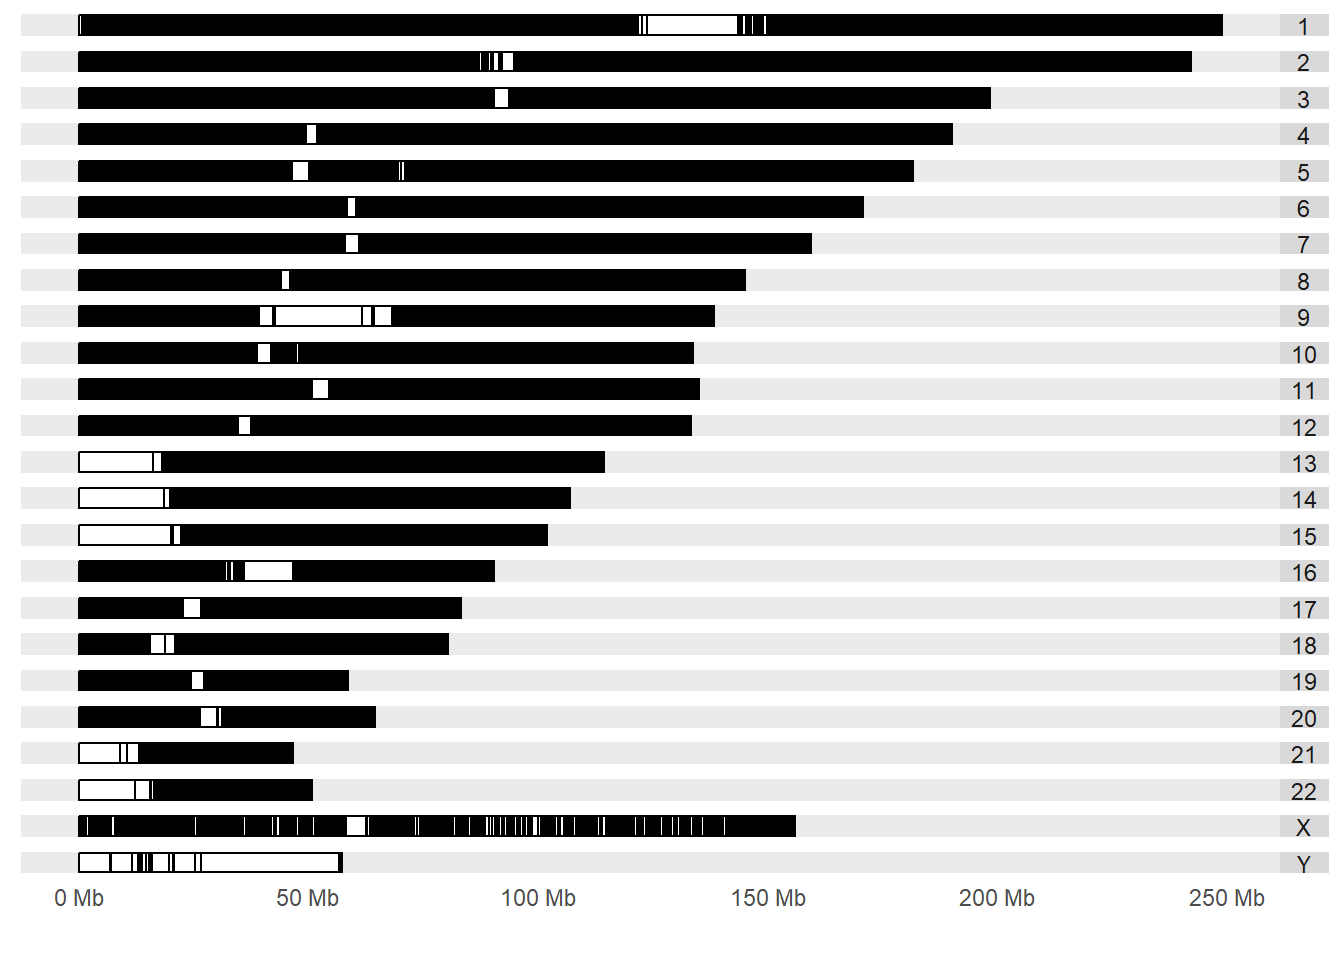

In [ ]:
ggbio::autoplot(gg, layout="karyogram")

We can see the peak data as a `GRanges` object:

In [ ]:
data("GM12878")

GM12878

GRanges object with 1873 ranges and 7 metadata columns:
         seqnames            ranges strand |      name     score       col
            <Rle>         <IRanges>  <Rle> | <numeric> <integer> <logical>
     [1]     chrX   1509355-1512462      * |         5         0      <NA>
     [2]     chrX 26801422-26802448      * |         6         0      <NA>
     [3]    chr19 11694102-11695359      * |         1         0      <NA>
     [4]    chr19   4076893-4079276      * |         4         0      <NA>
     [5]     chr3 53288568-53290767      * |         9         0      <NA>
     ...      ...               ...    ... .       ...       ...       ...
  [1869]    chr19 11201120-11203985      * |      8701         0      <NA>
  [1870]    chr19   2234920-2237370      * |       990         0      <NA>
  [1871]     chr1 94311336-94313543      * |      4035         0      <NA>
  [1872]    chr19 45690614-45691210      * |     10688         0      <NA>
  [1873]    chr19   6110100-6111252      * |

If we see the bottom of the `GRanges` table, this experiment have the hg19 annotation from the human genome. To work on the GRCh38 annotation we need to lift-over with a `.chain` file. For this we can use the `AnnotationHub` package.

In [ ]:
library(AnnotationHub)

Loading required package: BiocFileCache

Loading required package: dbplyr


Attaching package: 'dbplyr'

The following objects are masked from 'package:dplyr':

    ident, sql


Attaching package: 'AnnotationHub'

The following object is masked from 'package:Biobase':

    cache

The following object is masked from 'package:rtracklayer':

    hubUrl

AnnotationHub with 1 record
# snapshotDate(): 2023-10-23
# names(): AH14150
# $dataprovider: UCSC
# $species: Homo sapiens
# $rdataclass: ChainFile
# $rdatadateadded: 2014-12-15
# $title: hg19ToHg38.over.chain.gz
# $description: UCSC liftOver chain file from hg19 to hg38
# $taxonomyid: 9606
# $genome: hg19
# $sourcetype: Chain
# $sourceurl: http://hgdownload.cse.ucsc.edu/goldenpath/hg19/liftOver/hg19To...
# $sourcesize: NA
# $tags: c("liftOver", "chain", "UCSC", "genome", "homology") 
# retrieve record with 'object[["AH14150"]]' 

loading from cache

In [ ]:
GM12878 <- liftOver(GM12878, chain) |> 
  unlist()

seqlevelsStyle(GM12878) <- "NCBI"

seqinfo(GM12878) <- si.hs.38


seqlevelsStyle(GM12878) <- "UCSC"
seqlevelsStyle(gg) <- "UCSC"

We can find overlaps between the GWAS catalog and the ESRRA ChIP-Seq experiment but, there is a problem; the GWAS catalog is a collection of intervals that reports all significant SNPs and there can be duplications of SNPs associated to multiple phenotypes or the same SNP might be found for the same phenotype in different studies.

We can see the duplications with the `reduce` function from `IRanges` package:

In [ ]:
# duplicated loci
length(gg) - length(reduce(gg))

[1] 261160

We can see that there are `261160` duplicated loci. Let’s find the overlap between the *reduced* catalog and the ChIP-Seq experiment:

In [ ]:
#
fo = findOverlaps(GM12878, reduce(gg))
fo

Hits object with 613 hits and 0 metadata columns:
        queryHits subjectHits
        <integer>   <integer>
    [1]         6      237757
    [2]         9      221130
    [3]        12       25060
    [4]        15      104699
    [5]        15      104700
    ...       ...         ...
  [609]      1928      246305
  [610]      1929      244698
  [611]      1929      244699
  [612]      1931      250380
  [613]      1931      250381
  -------
  queryLength: 1932 / subjectLength: 268560

We can see 613 hits. Then, we are gonna eobtain the ranges from those hits, retrieve the phenotypes (DISEASE/TRAIT) and show the top 20 most common phenotypes with association to SNPs that lies on the ESRRA binding peaks.

In [ ]:
over_ranges <- reduce(gg)[subjectHits(fo)]


ii <- over_ranges |> 
  as.data.frame() |> 
  GenomicRanges::makeGRangesListFromDataFrame()


phset = lapply(ii, function(x){
  
  # print(glue::glue("On range: {x}"))
  unique(gg[which(gg %over% x)]$"DISEASE/TRAIT")
  
})

gwas_on_peaks <- phset |> 
    enframe() |> 
    unnest(value) |> 
    dplyr::count(value) |> 
    slice_max(n, n=20)


p <- gwas_on_peaks |> 
  mutate(value = fct_reorder(value,n)) |> 
  ggplot(aes(n,value, fill=value))+
  geom_col() +
  theme(legend.position = "none") +
  paletteer::scale_fill_paletteer_d("khroma::smoothrainbow") +
  theme_minimal()

bslib::card(plotly::ggplotly(p), full_screen = T)

Expand

Distinct phenotypes identified on the peaks:

In [ ]:
length(phset)

[1] 613

Now, how to do the inference of these phenotype on peaks of these b cells? We can use permutation on the genomic positions to test if the number of phenotypes found is due to chance or not.

In [ ]:
library(ph525x)

Loading required package: png

Loading required package: grid

Loading required package: VariantAnnotation

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'matrixStats'

The following objects are masked from 'package:Biobase':

    anyMissing, rowMedians

The following object is masked from 'package:dplyr':

    count


Attaching package: 'MatrixGenerics'

The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
    rowSdDiffs, rowSds, rowSums2, rowTabulates, rowVarDiffs, rowVars,
    rowWeightedMads, rowWeightedMeans, rowWeightedMedians,
    rowWeightedSds, rowWeig

The following object is masked from 'package:Biobase':

    rowMedians

Loading required package: SummarizedExperiment

Loading required package: Rsamtools

Loading required package: Biostrings

Loading required package: XVector


Attaching package: 'XVector'

The following object is masked from 'package:purrr':

    compact


Attaching package: 'Biostrings'

The following object is masked from 'package:grid':

    pattern

The following object is masked from 'package:base':

    strsplit


Attaching package: 'VariantAnnotation'

The following object is masked from 'package:stringr':

    fixed

The following object is masked from 'package:base':

    tabulate

[1] 0

## 3 Explore the TCGA

Please check the script below the image to see how to explore and get insights from the TCGA (The Cancer Genome Atlas) database.

``` python
readData = curatedTCGAData("READ", 
                           c("RNASeq2GeneNorm", "Mutation", "Methylation_methyl450"), 
                           dry.run = FALSE, version = "2.1.1")
```

    Working on: READ_Mutation-20160128see ?curatedTCGAData and browseVignettes('curatedTCGAData') for documentationloading from cacherequire("RaggedExperiment")Warning: package 'RaggedExperiment' was built under R version 4.3.1Working on: READ_RNASeq2GeneNorm-20160128see ?curatedTCGAData and browseVignettes('curatedTCGAData') for documentationloading from cacheWorking on: READ_Methylation_methyl450-20160128see ?curatedTCGAData and browseVignettes('curatedTCGAData') for documentationloading from cacherequire("rhdf5")Warning: package 'rhdf5' was built under R version 4.3.2see ?curatedTCGAData and browseVignettes('curatedTCGAData') for documentationloading from cacheLoading required package: HDF5ArrayWarning: package 'HDF5Array' was built under R version 4.3.2Loading required package: DelayedArrayWarning: package 'DelayedArray' was built under R version 4.3.1Loading required package: MatrixWarning: package 'Matrix' was built under R version 4.3.2
    Attaching package: 'Matrix'The following object is masked from 'package:S4Vectors':

        expandThe following objects are masked from 'package:tidyr':

        expand, pack, unpackLoading required package: S4ArraysWarning: package 'S4Arrays' was built under R version 4.3.2Loading required package: abind
    Attaching package: 'S4Arrays'The following object is masked from 'package:abind':

        abindThe following object is masked from 'package:base':

        rowsumLoading required package: SparseArrayWarning: package 'SparseArray' was built under R version 4.3.2
    Attaching package: 'DelayedArray'The following object is masked from 'package:purrr':

        simplifyThe following objects are masked from 'package:base':

        apply, scale, sweep
    Attaching package: 'HDF5Array'The following object is masked from 'package:rhdf5':

        h5lsWorking on: READ_colData-20160128see ?curatedTCGAData and browseVignettes('curatedTCGAData') for documentationloading from cacheWorking on: READ_sampleMap-20160128see ?curatedTCGAData and browseVignettes('curatedTCGAData') for documentationloading from cacheWorking on: READ_metadata-20160128see ?curatedTCGAData and browseVignettes('curatedTCGAData') for documentationloading from cacheharmonizing input:
      removing 1903 sampleMap rows not in names(experiments)
      removing 2 colData rownames not in sampleMap 'primary'

    A MultiAssayExperiment object of 3 listed
     experiments with user-defined names and respective classes.
     Containing an ExperimentList class object of length 3:
     [1] READ_Mutation-20160128: RaggedExperiment with 22075 rows and 69 columns
     [2] READ_RNASeq2GeneNorm-20160128: SummarizedExperiment with 18115 rows and 177 columns
     [3] READ_Methylation_methyl450-20160128: SummarizedExperiment with 485577 rows and 106 columns
    Functionality:
     experiments() - obtain the ExperimentList instance
     colData() - the primary/phenotype DataFrame
     sampleMap() - the sample coordination DataFrame
     `---
    title: Integrative Analysis of Multi-omic Data
    author:
      - name: Piero Palacios Bernuy
        orcid: 0000-0001-6729-4080
        corresponding: true
        email: p.palacios.bernuy@gmail.com
        roles:
          - Investigation
          - Bioinformatics
          - Deep learning
          - Visualization
    keywords:
      - Genomic Ranges
      - Omics
      - Bioconductor
    abstract: |
      This document is part of a series of the analysis of Omics data. Especifically, here is showed how to analyze bulk RNA-Seq data with Bioconductor packages. Also, it's showcased how to make plots of the RNA data in the context of differentially gene expression and gene-sets. 
    plain-language-summary: |
      This document have a example of the analysis of bulk RNA-Seq data.
    key-points:
      - A guide to analyze GWAS public data.
      - A guide to analyze TCGA database.
    date: last-modified
    bibliography: references.bib
    citation:
      container-title: An open source portfolio
    number-sections: true
    ---



    ## Introduction



    ## GWAS Catalog with a ChIP-Seq Experiment

    Here,  we are gonna analyze the relation between transcription factor binding (ESRRA binding data) from a ChIP-Seq experiment and the genome-wide associations between DNA variants and phenotypes like diseases. For this task, we are gonna use a the `gwascat` package distributed by the **EMBL** (European Molecular Biology Laboratories).



    ::: {.cell}

    ```{.r .cell-code .hidden}
    library(tidyverse)

    Warning: package 'ggplot2' was built under R version 4.3.2

    Warning: package 'tidyr' was built under R version 4.3.2

    Warning: package 'readr' was built under R version 4.3.2

    Warning: package 'purrr' was built under R version 4.3.2

    Warning: package 'dplyr' was built under R version 4.3.2

    Warning: package 'stringr' was built under R version 4.3.2

    Warning: package 'lubridate' was built under R version 4.3.2

    ── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
    ✔ dplyr     1.1.4     ✔ readr     2.1.5
    ✔ forcats   1.0.0     ✔ stringr   1.5.1
    ✔ ggplot2   3.5.0     ✔ tibble    3.2.1
    ✔ lubridate 1.9.3     ✔ tidyr     1.3.1
    ✔ purrr     1.0.2     
    ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
    ✖ dplyr::filter() masks stats::filter()
    ✖ dplyr::lag()    masks stats::lag()
    ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

``` r
library(gwascat)
```

    Warning: package 'gwascat' was built under R version 4.3.1

    gwascat loaded.  Use makeCurrentGwascat() to extract current image.
     from EBI.  The data folder of this package has some legacy extracts.

``` r
library(GenomeInfoDb)
```

    Warning: package 'GenomeInfoDb' was built under R version 4.3.2

    Loading required package: BiocGenerics

    Warning: package 'BiocGenerics' was built under R version 4.3.1


    Attaching package: 'BiocGenerics'

    The following objects are masked from 'package:lubridate':

        intersect, setdiff, union

    The following objects are masked from 'package:dplyr':

        combine, intersect, setdiff, union

    The following objects are masked from 'package:stats':

        IQR, mad, sd, var, xtabs

    The following objects are masked from 'package:base':

        anyDuplicated, aperm, append, as.data.frame, basename, cbind,
        colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
        get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
        match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
        Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
        table, tapply, union, unique, unsplit, which.max, which.min

    Loading required package: S4Vectors
    Loading required package: stats4

    Attaching package: 'S4Vectors'

    The following objects are masked from 'package:lubridate':

        second, second<-

    The following objects are masked from 'package:dplyr':

        first, rename

    The following object is masked from 'package:tidyr':

        expand

    The following object is masked from 'package:utils':

        findMatches

    The following objects are masked from 'package:base':

        expand.grid, I, unname

    Loading required package: IRanges

    Attaching package: 'IRanges'

    The following object is masked from 'package:lubridate':

        %within%

    The following objects are masked from 'package:dplyr':

        collapse, desc, slice

    The following object is masked from 'package:purrr':

        reduce

    The following object is masked from 'package:grDevices':

        windows

``` r
library(ERBS)
library(liftOver)
```

    Loading required package: GenomicRanges
    Loading required package: rtracklayer

    Warning: package 'rtracklayer' was built under R version 4.3.1

    Loading required package: Homo.sapiens
    Loading required package: AnnotationDbi

    Warning: package 'AnnotationDbi' was built under R version 4.3.2

    Loading required package: Biobase
    Welcome to Bioconductor

        Vignettes contain introductory material; view with
        'browseVignettes()'. To cite Bioconductor, see
        'citation("Biobase")', and for packages 'citation("pkgname")'.


    Attaching package: 'AnnotationDbi'

    The following object is masked from 'package:dplyr':

        select

    Loading required package: OrganismDbi

    Warning: package 'OrganismDbi' was built under R version 4.3.1

    Loading required package: GenomicFeatures

    Warning: package 'GenomicFeatures' was built under R version 4.3.2

    Loading required package: GO.db

    Loading required package: org.Hs.eg.db

    Loading required package: TxDb.Hsapiens.UCSC.hg19.knownGene

First, we need to download the data, keep the 24 chromosomes (from 1 to Y) and, specify the sequence information from the GRCh38 human genome annotation.

``` r
gwcat = get_cached_gwascat()

gg = gwcat |> as_GRanges()
```

    dropping 45505 records that have NA for CHR_POS

    1950 records have semicolon in CHR_POS; splitting and using first entry.

    3265 records have ' x ' in CHR_POS indicating multiple SNP effects, using first.

``` r
gg = keepStandardChromosomes(gg, pruning.mode = "coarse")

# seqlevelsStyle(gg) <- "UCSC"

seqlevels(gg) <- seqlevels(gg) |> 
  sortSeqlevels()

data("si.hs.38")

seqinfo(gg) <- si.hs.38
```

Now, let’s plot a karyogram that will show the SNP’s identified with significant associations with a phenotype. The SNP’s in the GWAS catalog have a stringent criterion of significance and there has been a replication of the finding from a independent population.

``` r
ggbio::autoplot(gg, layout="karyogram")
```

    Registered S3 method overwritten by 'GGally':
      method from   
      +.gg   ggplot2

    Scale for x is already present.
    Adding another scale for x, which will replace the existing scale.
    Scale for x is already present.
    Adding another scale for x, which will replace the existing scale.

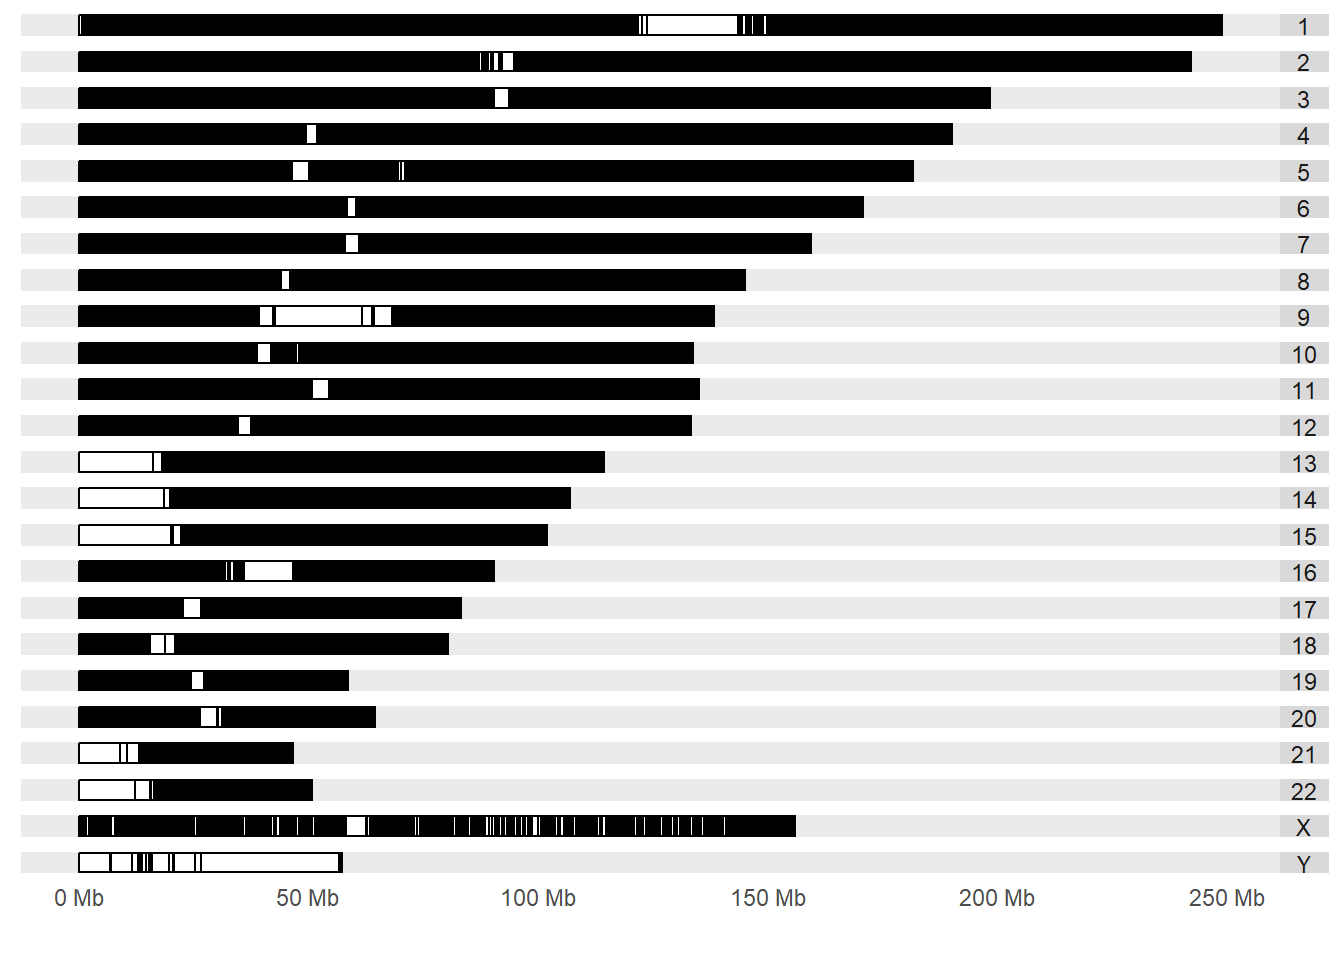

We can see the peak data as a `GRanges` object:

``` r
data("GM12878")

GM12878
```

    GRanges object with 1873 ranges and 7 metadata columns:
             seqnames            ranges strand |      name     score       col
                <Rle>         <IRanges>  <Rle> | <numeric> <integer> <logical>
         [1]     chrX   1509355-1512462      * |         5         0      <NA>
         [2]     chrX 26801422-26802448      * |         6         0      <NA>
         [3]    chr19 11694102-11695359      * |         1         0      <NA>
         [4]    chr19   4076893-4079276      * |         4         0      <NA>
         [5]     chr3 53288568-53290767      * |         9         0      <NA>
         ...      ...               ...    ... .       ...       ...       ...
      [1869]    chr19 11201120-11203985      * |      8701         0      <NA>
      [1870]    chr19   2234920-2237370      * |       990         0      <NA>
      [1871]     chr1 94311336-94313543      * |      4035         0      <NA>
      [1872]    chr19 45690614-45691210      * |     10688         0      <NA>
      [1873]    chr19   6110100-6111252      * |      2274         0      <NA>
             signalValue    pValue    qValue      peak
               <numeric> <numeric> <numeric> <integer>
         [1]      157.92   310.000        32      1991
         [2]      147.38   310.000        32       387
         [3]       99.71   311.660        32       861
         [4]       84.74   310.000        32      1508
         [5]       78.20   299.505        32      1772
         ...         ...       ...       ...       ...
      [1869]        8.65     7.281   0.26576      2496
      [1870]        8.65    26.258   1.99568      1478
      [1871]        8.65    12.511   1.47237      1848
      [1872]        8.65     6.205   0.00000       298
      [1873]        8.65    17.356   2.01323       496
      -------
      seqinfo: 93 sequences (1 circular) from hg19 genome

If we see the bottom of the `GRanges` table, this experiment have the hg19 annotation from the human genome. To work on the GRCh38 annotation we need to lift-over with a `.chain` file. For this we can use the `AnnotationHub` package.

``` r
library(AnnotationHub)
```

    Warning: package 'AnnotationHub' was built under R version 4.3.1

    Loading required package: BiocFileCache

    Warning: package 'BiocFileCache' was built under R version 4.3.1

    Loading required package: dbplyr

    Warning: package 'dbplyr' was built under R version 4.3.2


    Attaching package: 'dbplyr'

    The following objects are masked from 'package:dplyr':

        ident, sql


    Attaching package: 'AnnotationHub'

    The following object is masked from 'package:Biobase':

        cache

    The following object is masked from 'package:rtracklayer':

        hubUrl

``` r
ah <- AnnotationHub::AnnotationHub()

query(ah, c("hg19ToHg38.over.chain"))
```

    AnnotationHub with 1 record
    # snapshotDate(): 2023-10-23
    # names(): AH14150
    # $dataprovider: UCSC
    # $species: Homo sapiens
    # $rdataclass: ChainFile
    # $rdatadateadded: 2014-12-15
    # $title: hg19ToHg38.over.chain.gz
    # $description: UCSC liftOver chain file from hg19 to hg38
    # $taxonomyid: 9606
    # $genome: hg19
    # $sourcetype: Chain
    # $sourceurl: http://hgdownload.cse.ucsc.edu/goldenpath/hg19/liftOver/hg19To...
    # $sourcesize: NA
    # $tags: c("liftOver", "chain", "UCSC", "genome", "homology") 
    # retrieve record with 'object[["AH14150"]]' 

``` r
chain <- ah[["AH14150"]]
```

    loading from cache

``` r
GM12878 <- liftOver(GM12878, chain) |> 
  unlist()

seqlevelsStyle(GM12878) <- "NCBI"

seqinfo(GM12878) <- si.hs.38


seqlevelsStyle(GM12878) <- "UCSC"
seqlevelsStyle(gg) <- "UCSC"
```

We can find overlaps between the GWAS catalog and the ESRRA ChIP-Seq experiment but, there is a problem; the GWAS catalog is a collection of intervals that reports all significant SNPs and there can be duplications of SNPs associated to multiple phenotypes or the same SNP might be found for the same phenotype in different studies.

We can see the duplications with the `reduce` function from `IRanges` package:

``` r
# duplicated loci
length(gg) - length(reduce(gg))
```

    [1] 261160

We can see that there are `261160` duplicated loci. Let’s find the overlap between the *reduced* catalog and the ChIP-Seq experiment:

``` r
#
fo = findOverlaps(GM12878, reduce(gg))
fo
```

    Hits object with 613 hits and 0 metadata columns:
            queryHits subjectHits
            <integer>   <integer>
        [1]         6      237757
        [2]         9      221130
        [3]        12       25060
        [4]        15      104699
        [5]        15      104700
        ...       ...         ...
      [609]      1928      246305
      [610]      1929      244698
      [611]      1929      244699
      [612]      1931      250380
      [613]      1931      250381
      -------
      queryLength: 1932 / subjectLength: 268560

We can see 613 hits. Then, we are gonna eobtain the ranges from those hits, retrieve the phenotypes (DISEASE/TRAIT) and show the top 20 most common phenotypes with association to SNPs that lies on the ESRRA binding peaks.

``` r
over_ranges <- reduce(gg)[subjectHits(fo)]


ii <- over_ranges |> 
  as.data.frame() |> 
  GenomicRanges::makeGRangesListFromDataFrame()


phset = lapply(ii, function(x){
  
  # print(glue::glue("On range: {x}"))
  unique(gg[which(gg %over% x)]$"DISEASE/TRAIT")
  
})

gwas_on_peaks <- phset |> 
    enframe() |> 
    unnest(value) |> 
    dplyr::count(value) |> 
    slice_max(n, n=20)


p <- gwas_on_peaks |> 
  mutate(value = fct_reorder(value,n)) |> 
  ggplot(aes(n,value, fill=value))+
  geom_col() +
  theme(legend.position = "none") +
  paletteer::scale_fill_paletteer_d("khroma::smoothrainbow") +
  theme_minimal()

bslib::card(plotly::ggplotly(p), full_screen = T)
```

<div class="card bslib-card bslib-mb-spacing html-fill-item html-fill-container" data-bslib-card-init data-full-screen="false" data-require-bs-caller="card()" data-require-bs-version="5">
<div class="card-body bslib-gap-spacing html-fill-item html-fill-container" style="margin-top:auto;margin-bottom:auto;flex:1 1 auto;">
<div class="plotly html-widget html-fill-item" id="htmlwidget-171c168db4a533b58e5b" style="width:100%;height:400px;"></div>
<script type="application/json" data-for="htmlwidget-171c168db4a533b58e5b">{"x":{"data":[{"orientation":"v","width":7,"base":0.55000000000000004,"x":[3.5],"y":[0.89999999999999991],"text":"n:  7<br />value: Appendicular lean mass<br />value: Appendicular lean mass","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(232,236,251,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Appendicular lean mass","legendgroup":"Appendicular lean mass","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":7,"base":1.55,"x":[3.5],"y":[0.90000000000000013],"text":"n:  7<br />value: Diastolic blood pressure<br />value: Diastolic blood pressure","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(221,216,239,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Diastolic blood pressure","legendgroup":"Diastolic blood pressure","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":7,"base":2.5499999999999998,"x":[3.5],"y":[0.90000000000000036],"text":"n:  7<br />value: Educational attainment<br />value: Educational attainment","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(209,193,225,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Educational attainment","legendgroup":"Educational attainment","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":7,"base":3.5499999999999998,"x":[3.5],"y":[0.90000000000000036],"text":"n:  7<br />value: Lymphocyte count<br />value: Lymphocyte count","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(195,168,209,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Lymphocyte count","legendgroup":"Lymphocyte count","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":7,"base":4.5499999999999998,"x":[3.5],"y":[0.90000000000000036],"text":"n:  7<br />value: Mean spheric corpuscular volume<br />value: Mean spheric corpuscular volume","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(181,143,194,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Mean spheric corpuscular volume","legendgroup":"Mean spheric corpuscular volume","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":7,"base":5.5499999999999998,"x":[3.5],"y":[0.90000000000000036],"text":"n:  7<br />value: Monocyte count<br />value: Monocyte count","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(167,120,180,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Monocyte count","legendgroup":"Monocyte count","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":7,"base":6.5499999999999998,"x":[3.5],"y":[0.90000000000000036],"text":"n:  7<br />value: Plateletcrit<br />value: Plateletcrit","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(155,98,167,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Plateletcrit","legendgroup":"Plateletcrit","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":7,"base":7.5499999999999998,"x":[3.5],"y":[0.89999999999999947],"text":"n:  7<br />value: Reticulocyte fraction of red cells<br />value: Reticulocyte fraction of red cells","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(140,78,153,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Reticulocyte fraction of red cells","legendgroup":"Reticulocyte fraction of red cells","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":7,"base":8.5500000000000007,"x":[3.5],"y":[0.89999999999999858],"text":"n:  7<br />value: Rheumatoid arthritis<br />value: Rheumatoid arthritis","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(111,76,155,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Rheumatoid arthritis","legendgroup":"Rheumatoid arthritis","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":7,"base":9.5500000000000007,"x":[3.5],"y":[0.89999999999999858],"text":"n:  7<br />value: Triglyceride levels<br />value: Triglyceride levels","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(96,89,169,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Triglyceride levels","legendgroup":"Triglyceride levels","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":7,"base":10.550000000000001,"x":[3.5],"y":[0.89999999999999858],"text":"n:  7<br />value: Type 2 diabetes<br />value: Type 2 diabetes","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(85,104,184,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Type 2 diabetes","legendgroup":"Type 2 diabetes","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":8,"base":11.550000000000001,"x":[4],"y":[0.89999999999999858],"text":"n:  8<br />value: Heel bone mineral density<br />value: Heel bone mineral density","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(78,121,197,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Heel bone mineral density","legendgroup":"Heel bone mineral density","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":8,"base":12.550000000000001,"x":[4],"y":[0.89999999999999858],"text":"n:  8<br />value: Systolic blood pressure<br />value: Systolic blood pressure","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(77,138,198,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Systolic blood pressure","legendgroup":"Systolic blood pressure","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":9,"base":13.550000000000001,"x":[4.5],"y":[0.89999999999999858],"text":"n:  9<br />value: Sex hormone-binding globulin levels<br />value: Sex hormone-binding globulin levels","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(78,150,188,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Sex hormone-binding globulin levels","legendgroup":"Sex hormone-binding globulin levels","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":10,"base":14.550000000000001,"x":[5],"y":[0.89999999999999858],"text":"n: 10<br />value: Eosinophil counts<br />value: Eosinophil counts","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(84,158,179,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Eosinophil counts","legendgroup":"Eosinophil counts","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":10,"base":15.550000000000001,"x":[5],"y":[0.89999999999999858],"text":"n: 10<br />value: HDL cholesterol levels<br />value: HDL cholesterol levels","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(89,165,169,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"HDL cholesterol levels","legendgroup":"HDL cholesterol levels","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":10,"base":16.550000000000001,"x":[5],"y":[0.89999999999999858],"text":"n: 10<br />value: Hematocrit<br />value: Hematocrit","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(96,171,158,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Hematocrit","legendgroup":"Hematocrit","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":10,"base":17.550000000000001,"x":[5],"y":[0.89999999999999858],"text":"n: 10<br />value: Platelet count<br />value: Platelet count","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(105,177,144,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Platelet count","legendgroup":"Platelet count","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":10,"base":18.550000000000001,"x":[5],"y":[0.89999999999999858],"text":"n: 10<br />value: Total cholesterol levels<br />value: Total cholesterol levels","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(119,183,125,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Total cholesterol levels","legendgroup":"Total cholesterol levels","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":10,"base":19.550000000000001,"x":[5],"y":[0.89999999999999858],"text":"n: 10<br />value: Waist-to-hip ratio adjusted for BMI<br />value: Waist-to-hip ratio adjusted for BMI","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(140,188,104,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Waist-to-hip ratio adjusted for BMI","legendgroup":"Waist-to-hip ratio adjusted for BMI","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":10,"base":20.550000000000001,"x":[5],"y":[0.89999999999999858],"text":"n: 10<br />value: White blood cell count<br />value: White blood cell count","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(166,190,84,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"White blood cell count","legendgroup":"White blood cell count","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":11,"base":21.550000000000001,"x":[5.5],"y":[0.89999999999999858],"text":"n: 11<br />value: High density lipoprotein cholesterol levels<br />value: High density lipoprotein cholesterol levels","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(190,188,72,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"High density lipoprotein cholesterol levels","legendgroup":"High density lipoprotein cholesterol levels","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":13,"base":22.550000000000001,"x":[6.5],"y":[0.89999999999999858],"text":"n: 13<br />value: Multi-trait sex score<br />value: Multi-trait sex score","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(209,181,65,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Multi-trait sex score","legendgroup":"Multi-trait sex score","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":14,"base":23.550000000000001,"x":[7],"y":[0.89999999999999858],"text":"n: 14<br />value: Body mass index<br />value: Body mass index","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(221,170,60,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Body mass index","legendgroup":"Body mass index","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":15,"base":24.550000000000001,"x":[7.5],"y":[0.89999999999999858],"text":"n: 15<br />value: Red cell distribution width<br />value: Red cell distribution width","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(228,156,57,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Red cell distribution width","legendgroup":"Red cell distribution width","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":16,"base":25.550000000000001,"x":[8],"y":[0.89999999999999858],"text":"n: 16<br />value: Mean corpuscular volume<br />value: Mean corpuscular volume","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(231,140,53,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Mean corpuscular volume","legendgroup":"Mean corpuscular volume","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":18,"base":26.550000000000001,"x":[9],"y":[0.89999999999999858],"text":"n: 18<br />value: Red blood cell count<br />value: Red blood cell count","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(230,121,50,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Red blood cell count","legendgroup":"Red blood cell count","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":25,"base":27.550000000000001,"x":[12.5],"y":[0.89999999999999858],"text":"n: 25<br />value: Mean corpuscular hemoglobin<br />value: Mean corpuscular hemoglobin","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(228,99,45,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Mean corpuscular hemoglobin","legendgroup":"Mean corpuscular hemoglobin","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null},{"orientation":"v","width":48,"base":28.550000000000001,"x":[24],"y":[0.89999999999999858],"text":"n: 48<br />value: Height<br />value: Height","type":"bar","textposition":"none","marker":{"autocolorscale":false,"color":"rgba(223,72,40,1)","line":{"width":1.8897637795275593,"color":"transparent"}},"name":"Height","legendgroup":"Height","showlegend":true,"xaxis":"x","yaxis":"y","hoverinfo":"text","frame":null}],"layout":{"margin":{"t":26.228310502283104,"r":7.3059360730593621,"b":40.182648401826491,"l":276.89497716894988},"font":{"color":"rgba(0,0,0,1)","family":"","size":14.611872146118724},"xaxis":{"domain":[0,1],"automargin":true,"type":"linear","autorange":false,"range":[-2.4000000000000004,50.399999999999999],"tickmode":"array","ticktext":["0","10","20","30","40","50"],"tickvals":[0,10,20,30,40,50],"categoryorder":"array","categoryarray":["0","10","20","30","40","50"],"nticks":null,"ticks":"","tickcolor":null,"ticklen":3.6529680365296811,"tickwidth":0,"showticklabels":true,"tickfont":{"color":"rgba(77,77,77,1)","family":"","size":11.68949771689498},"tickangle":-0,"showline":false,"linecolor":null,"linewidth":0,"showgrid":true,"gridcolor":"rgba(235,235,235,1)","gridwidth":0.66417600664176002,"zeroline":false,"anchor":"y","title":{"text":"n","font":{"color":"rgba(0,0,0,1)","family":"","size":14.611872146118724}},"hoverformat":".2f"},"yaxis":{"domain":[0,1],"automargin":true,"type":"linear","autorange":false,"range":[0.40000000000000002,29.600000000000001],"tickmode":"array","ticktext":["Appendicular lean mass","Diastolic blood pressure","Educational attainment","Lymphocyte count","Mean spheric corpuscular volume","Monocyte count","Plateletcrit","Reticulocyte fraction of red cells","Rheumatoid arthritis","Triglyceride levels","Type 2 diabetes","Heel bone mineral density","Systolic blood pressure","Sex hormone-binding globulin levels","Eosinophil counts","HDL cholesterol levels","Hematocrit","Platelet count","Total cholesterol levels","Waist-to-hip ratio adjusted for BMI","White blood cell count","High density lipoprotein cholesterol levels","Multi-trait sex score","Body mass index","Red cell distribution width","Mean corpuscular volume","Red blood cell count","Mean corpuscular hemoglobin","Height"],"tickvals":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29],"categoryorder":"array","categoryarray":["Appendicular lean mass","Diastolic blood pressure","Educational attainment","Lymphocyte count","Mean spheric corpuscular volume","Monocyte count","Plateletcrit","Reticulocyte fraction of red cells","Rheumatoid arthritis","Triglyceride levels","Type 2 diabetes","Heel bone mineral density","Systolic blood pressure","Sex hormone-binding globulin levels","Eosinophil counts","HDL cholesterol levels","Hematocrit","Platelet count","Total cholesterol levels","Waist-to-hip ratio adjusted for BMI","White blood cell count","High density lipoprotein cholesterol levels","Multi-trait sex score","Body mass index","Red cell distribution width","Mean corpuscular volume","Red blood cell count","Mean corpuscular hemoglobin","Height"],"nticks":null,"ticks":"","tickcolor":null,"ticklen":3.6529680365296811,"tickwidth":0,"showticklabels":true,"tickfont":{"color":"rgba(77,77,77,1)","family":"","size":11.68949771689498},"tickangle":-0,"showline":false,"linecolor":null,"linewidth":0,"showgrid":true,"gridcolor":"rgba(235,235,235,1)","gridwidth":0.66417600664176002,"zeroline":false,"anchor":"x","title":{"text":"value","font":{"color":"rgba(0,0,0,1)","family":"","size":14.611872146118724}},"hoverformat":".2f"},"shapes":[{"type":"rect","fillcolor":null,"line":{"color":null,"width":0,"linetype":[]},"yref":"paper","xref":"paper","x0":0,"x1":1,"y0":0,"y1":1}],"showlegend":true,"legend":{"bgcolor":null,"bordercolor":null,"borderwidth":0,"font":{"color":"rgba(0,0,0,1)","family":"","size":11.68949771689498},"title":{"text":"value","font":{"color":"rgba(0,0,0,1)","family":"","size":14.611872146118724}}},"hovermode":"closest","barmode":"relative"},"config":{"doubleClick":"reset","modeBarButtonsToAdd":["hoverclosest","hovercompare"],"showSendToCloud":false},"source":"A","attrs":{"4a54687b65e1":{"x":{},"y":{},"fill":{},"type":"bar"}},"cur_data":"4a54687b65e1","visdat":{"4a54687b65e1":["function (y) ","x"]},"highlight":{"on":"plotly_click","persistent":false,"dynamic":false,"selectize":false,"opacityDim":0.20000000000000001,"selected":{"opacity":1},"debounce":0},"shinyEvents":["plotly_hover","plotly_click","plotly_selected","plotly_relayout","plotly_brushed","plotly_brushing","plotly_clickannotation","plotly_doubleclick","plotly_deselect","plotly_afterplot","plotly_sunburstclick"],"base_url":"https://plot.ly"},"evals":[],"jsHooks":[]}</script>
</div>
<bslib-tooltip placement="auto" bsOptions="[]" data-require-bs-version="5" data-require-bs-caller="tooltip()">
<template>Expand</template>
<span class="bslib-full-screen-enter badge rounded-pill"><svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 24 24" style="height:1em;width:1em;fill:currentColor;" aria-hidden="true" role="img"><path d="M20 5C20 4.4 19.6 4 19 4H13C12.4 4 12 3.6 12 3C12 2.4 12.4 2 13 2H21C21.6 2 22 2.4 22 3V11C22 11.6 21.6 12 21 12C20.4 12 20 11.6 20 11V5ZM4 19C4 19.6 4.4 20 5 20H11C11.6 20 12 20.4 12 21C12 21.6 11.6 22 11 22H3C2.4 22 2 21.6 2 21V13C2 12.4 2.4 12 3 12C3.6 12 4 12.4 4 13V19Z"/></svg></span>
</bslib-tooltip>
<script data-bslib-card-init>bslib.Card.initializeAllCards();</script>
</div>

Distinct phenotypes identified on the peaks:

``` r
length(phset)
```

    [1] 613

Now, how to do the inference of these phenotype on peaks of these b cells? We can use permutation on the genomic positions to test if the number of phenotypes found is due to chance or not.

``` r
library(ph525x)
```

    Loading required package: png

    Loading required package: grid

    Loading required package: VariantAnnotation

    Warning: package 'VariantAnnotation' was built under R version 4.3.2

    Loading required package: MatrixGenerics

    Warning: package 'MatrixGenerics' was built under R version 4.3.1

    Loading required package: matrixStats

    Warning: package 'matrixStats' was built under R version 4.3.2


    Attaching package: 'matrixStats'

    The following objects are masked from 'package:Biobase':

        anyMissing, rowMedians

    The following object is masked from 'package:dplyr':

        count


    Attaching package: 'MatrixGenerics'

    The following objects are masked from 'package:matrixStats':

        colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
        colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
        colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
        colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
        colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
        colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
        colWeightedMeans, colWeightedMedians, colWeightedSds,
        colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
        rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
        rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
        rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
        rowOrderStats, rowProds, rowQuantiles, rowRanges, rowRanks,
        rowSdDiffs, rowSds, rowSums2, rowTabulates, rowVarDiffs, rowVars,
        rowWeightedMads, rowWeightedMeans, rowWeightedMedians,
        rowWeightedSds, rowWeightedVars

    The following object is masked from 'package:Biobase':

        rowMedians

    Loading required package: SummarizedExperiment

    Warning: package 'SummarizedExperiment' was built under R version 4.3.1

    Loading required package: Rsamtools

    Warning: package 'Rsamtools' was built under R version 4.3.1

    Loading required package: Biostrings

    Warning: package 'Biostrings' was built under R version 4.3.2

    Loading required package: XVector

    Warning: package 'XVector' was built under R version 4.3.1


    Attaching package: 'XVector'

    The following object is masked from 'package:purrr':

        compact


    Attaching package: 'Biostrings'

    The following object is masked from 'package:grid':

        pattern

    The following object is masked from 'package:base':

        strsplit


    Attaching package: 'VariantAnnotation'

    The following object is masked from 'package:stringr':

        fixed

    The following object is masked from 'package:base':

        tabulate

``` r
library(progress)
```

    Warning: package 'progress' was built under R version 4.3.3

``` r
set.seed(123)

n_iter = 100

pb <- progress_bar$new(format = "(:spin) [:bar] :percent [Elapsed time: :elapsedfull || Estimated time remaining: :eta]",
                       total = n_iter,
                       complete = "=",   # Completion bar character
                       incomplete = " ", # Incomplete bar character
                       current = ">",    # Current bar character
                       clear = FALSE,    # If TRUE, clears the bar when finish
                       width = 100)   


rsc = sapply(1:n_iter, function(x) {
    pb$tick()
    length(findOverlaps(reposition(GM12878), reduce(gg))) |> 
    suppressWarnings()
    
})

# compute prop with more overlaps than in observed data
mean(rsc > length(fo))
```

    [1] 0

## 4 Explore the TCGA

Please check the script below the image to see how to explore and get insights from the TCGA (The Cancer Genome Atlas) database.

, `[`, `[[` - extract colData columns, subset, or experiment \*Format() - convert into a long or wide DataFrame assays() - convert ExperimentList to a SimpleList of matrices exportClass() - save data to flat files \`\`\`

:::

## 5 Conclusion

## References